In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
bike = pd.read_csv('day.csv',index_col=0)

In [3]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 15)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [6]:
# check for missing values
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike = bike.drop(['dteday','casual','registered'],axis=1)

In [8]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
#Converting Categorical Variables
bike.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'), inplace=True)
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
2,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
3,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
cat_cols = ['season','yr','holiday','weekday','workingday','weathersit']
cont_cols = ['temp','atemp','hum','windspeed']

In [12]:
# Univariate Analysis


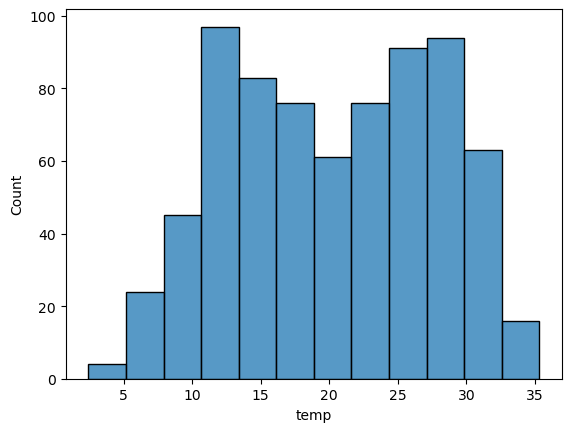

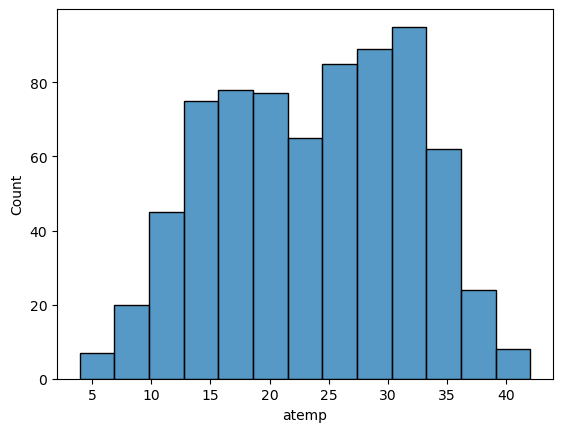

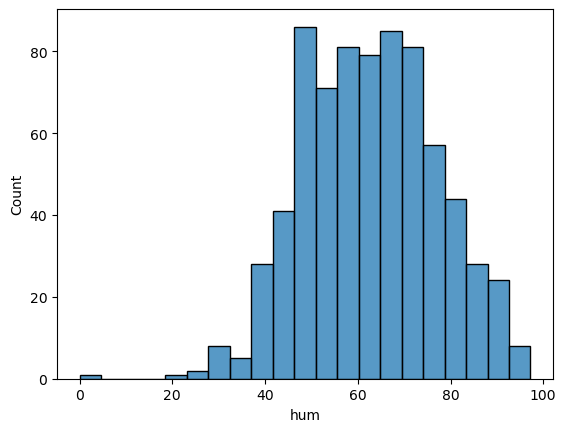

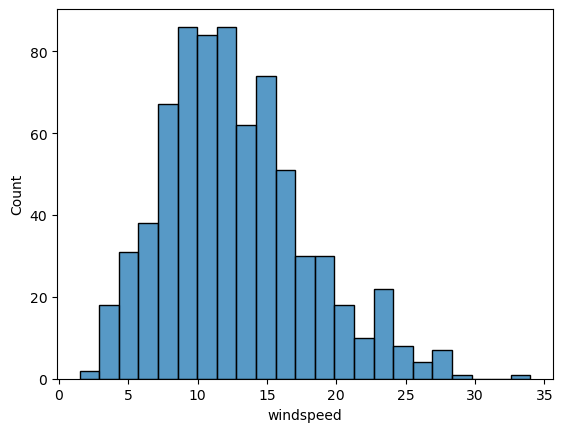

In [13]:
for i in cont_cols:
    sns.histplot(x=bike[i])
    plt.show()

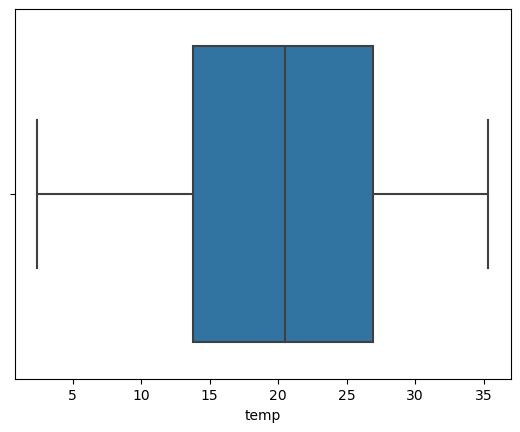

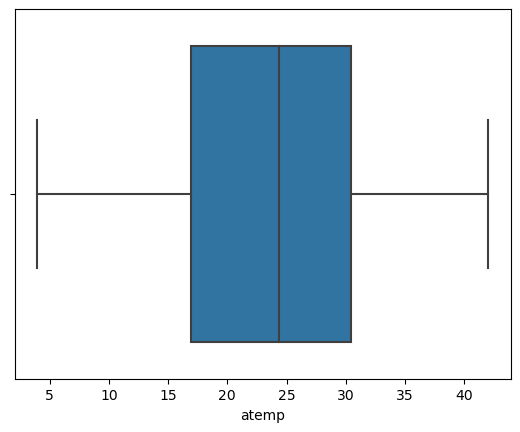

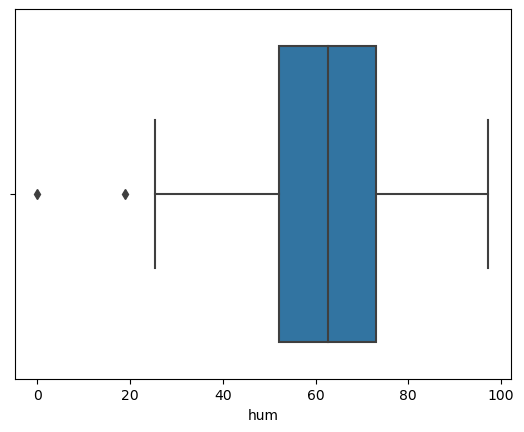

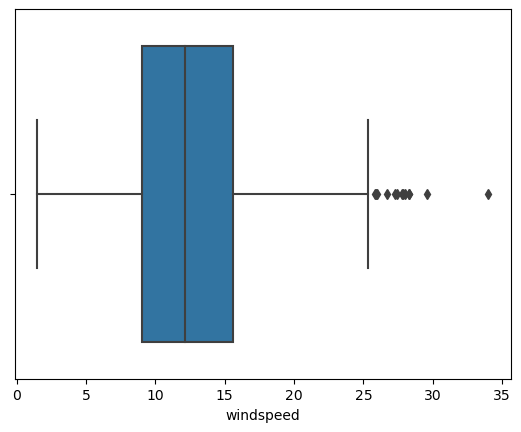

In [14]:
for i in cont_cols:
    sns.boxplot(x=bike[i])
    plt.show()

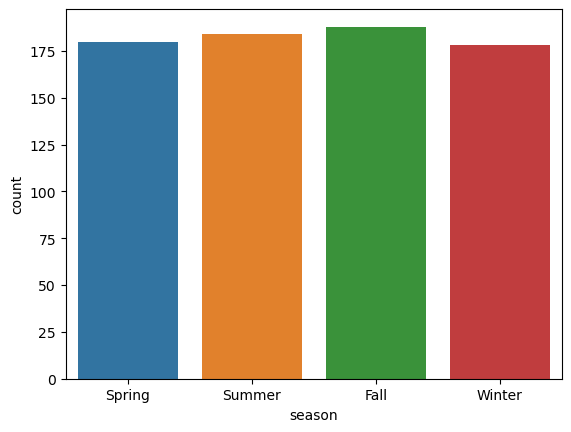

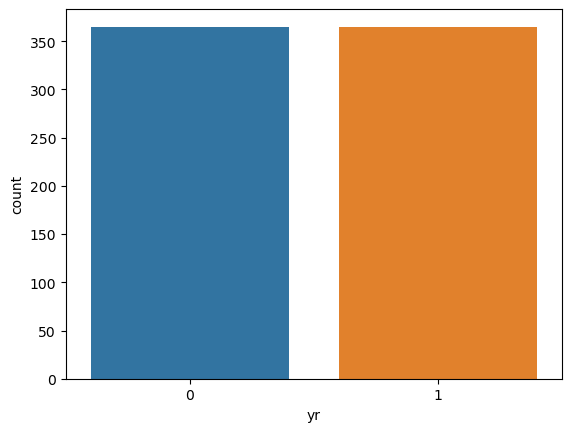

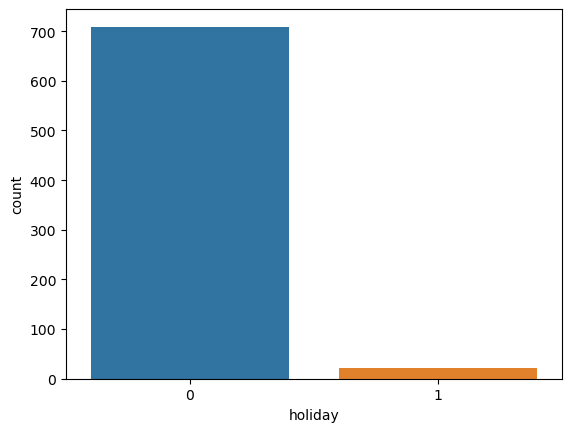

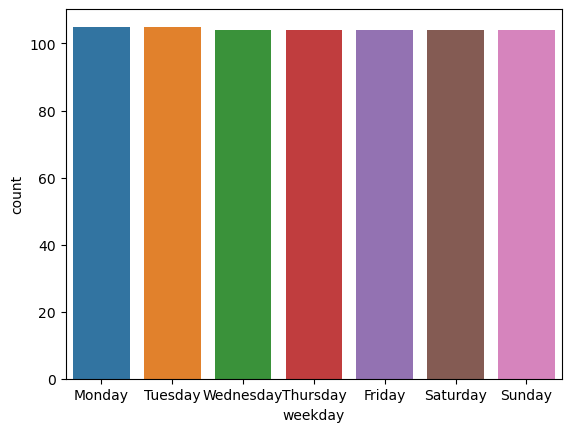

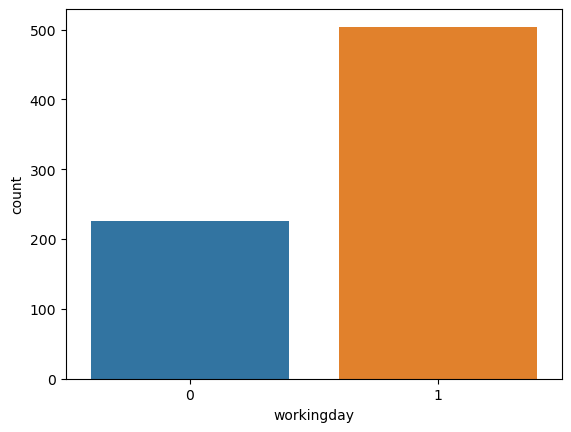

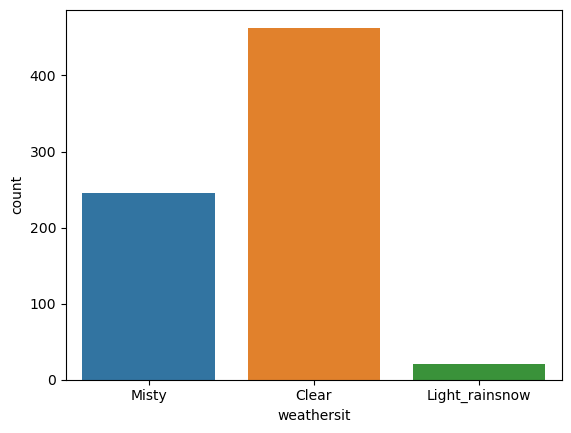

In [15]:
for i in cat_cols:
    sns.countplot(x=bike[i])
    plt.show()

In [16]:
#Bivariate Analysis

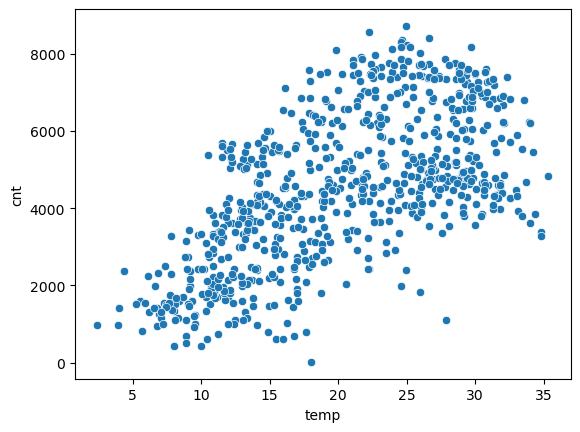

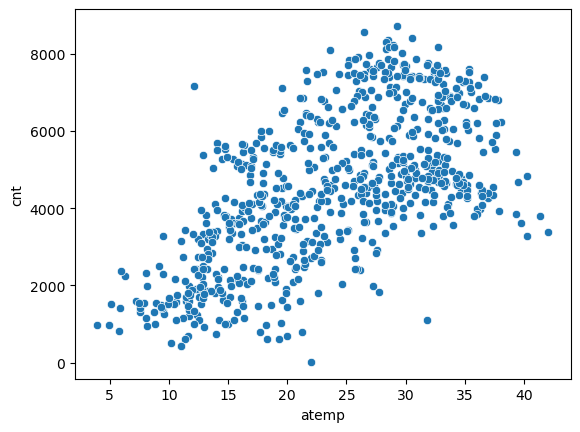

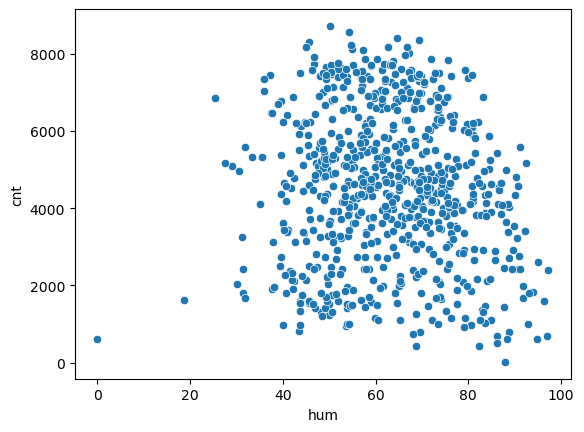

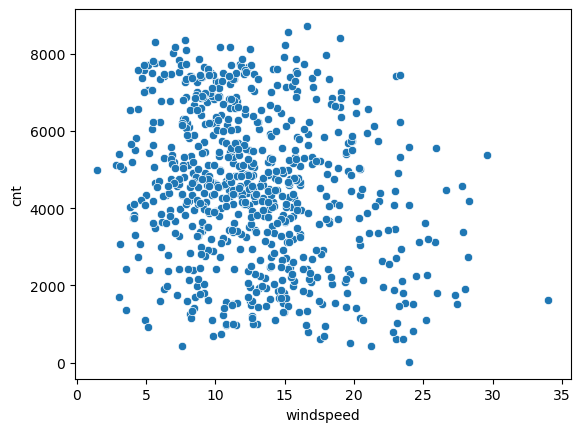

In [17]:
for i in cont_cols:
    sns.scatterplot(x=bike[i],y=bike['cnt'])
    plt.show()

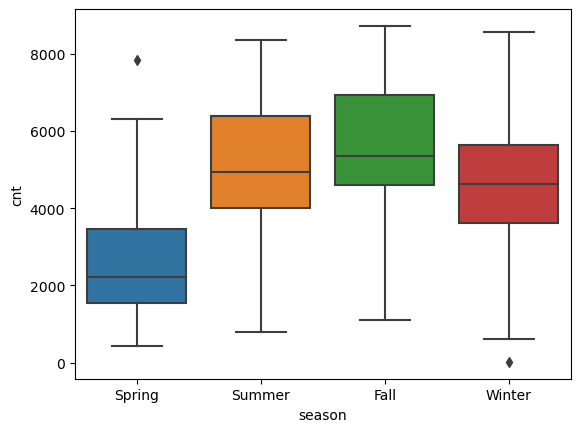

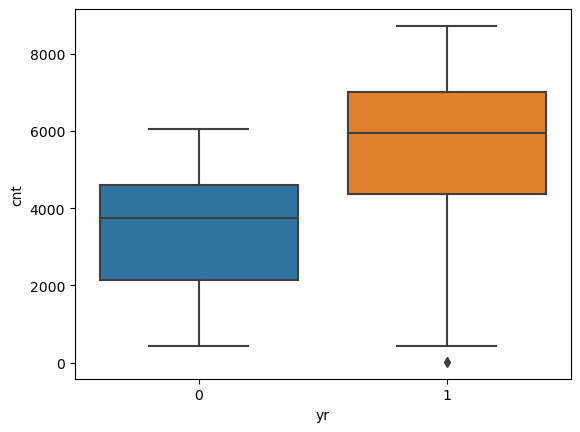

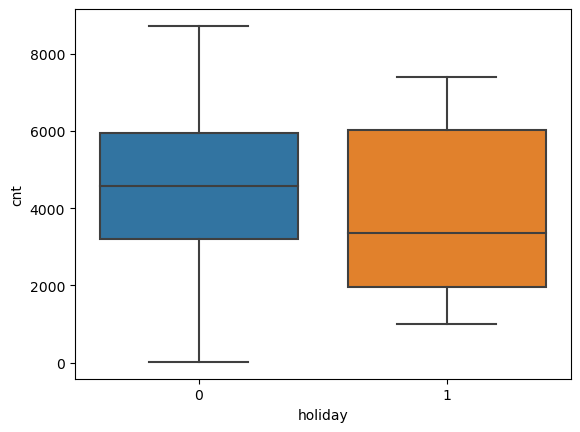

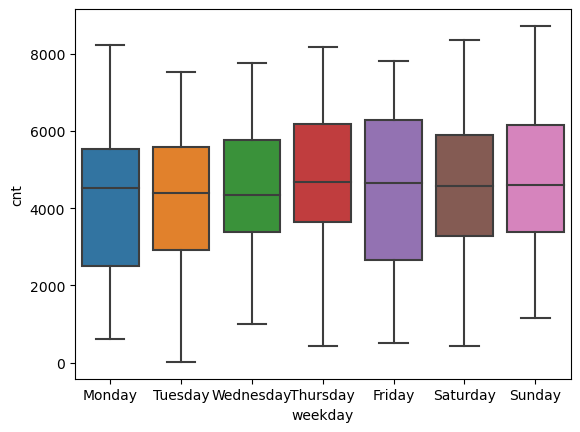

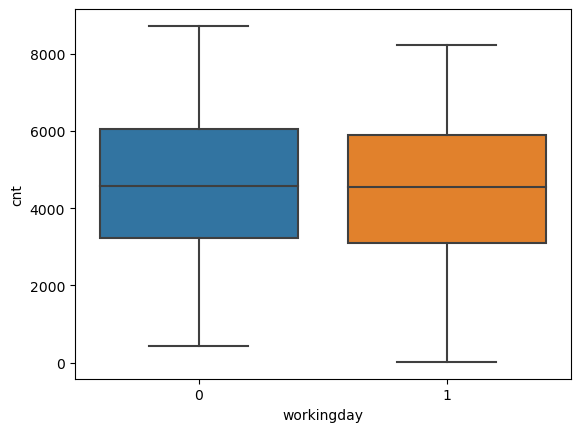

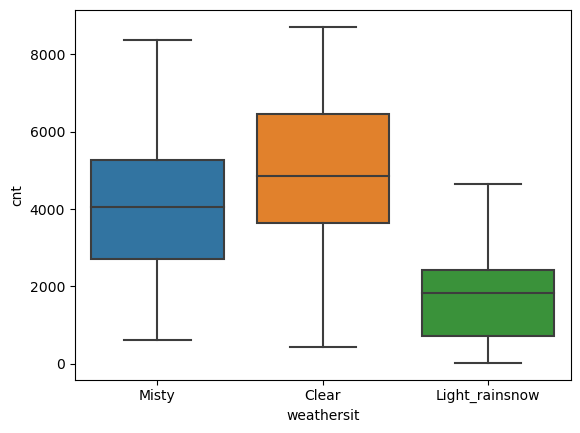

In [18]:
for i in cat_cols:
    sns.boxplot(x=bike[i],y=bike['cnt'])
    plt.show()

<AxesSubplot:>

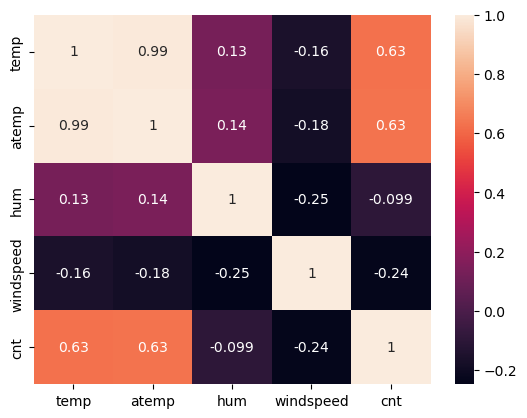

In [19]:
sns.heatmap(bike[cont_cols+['cnt']].corr(),annot = True)

In [20]:
# Preparing the data for modelling

In [21]:
bike.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [22]:
#creating dummy vars for seasons
season1 = pd.get_dummies(bike['season'],drop_first = True)

In [23]:
##creating dummy vars for months
mnth1 = pd.get_dummies(bike['mnth'],drop_first = True)


In [24]:
##creating dummy vars for weathersit
weathersit1 = pd.get_dummies(bike['weathersit'],drop_first = True)

In [25]:
##creating dummy vars for weekday
weekday1 = pd.get_dummies(bike['weekday'],drop_first = True)

In [26]:
bike = pd.concat([bike,season1,mnth1,weathersit1,weekday1],axis=1)

In [27]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
2,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
3,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
4,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
5,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bike = bike.drop(['season','mnth','weathersit','weekday'],axis =1)

In [29]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Light_rainsnow', 'Misty',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [30]:
#Train test split
X = bike.drop(['cnt'],axis = 1)
y = bike['cnt']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.2,random_state = 100)

In [32]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
368,1,0,1,6.150000,6.31375,44.1250,24.499957,1,0,0,...,0,0,0,0,0,0,0,1,0,0
649,1,0,1,17.835000,21.55835,46.3333,12.166932,0,0,1,...,1,0,0,0,0,0,0,0,0,0
45,0,0,1,17.015000,19.91750,37.5833,27.999836,1,0,0,...,0,0,0,0,0,0,0,0,0,1
706,1,0,0,13.154153,16.09790,76.4167,8.750200,0,0,1,...,0,0,0,1,0,1,0,0,0,0
380,1,0,1,6.833347,8.08125,41.9167,16.834286,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
X_test.shape

(146, 29)

In [34]:
y_train.head()

instant
368    2236
649    7570
45     1913
706    5008
380    2311
Name: cnt, dtype: int64

In [35]:
# Scaling 
#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

nums_vars= ['temp','atemp','hum','windspeed']

X_train[nums_vars] = scaler.fit_transform(X_train[nums_vars])
X_test[nums_vars] = scaler.fit_transform(X_test[nums_vars])


In [36]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
368,1,0,1,0.113228,0.061963,0.454701,0.695175,1,0,0,...,0,0,0,0,0,0,0,1,0,0
649,1,0,1,0.468352,0.462175,0.477458,0.299450,0,0,1,...,1,0,0,0,0,0,0,0,0,0
45,0,0,1,0.443431,0.419099,0.387290,0.807474,1,0,0,...,0,0,0,0,0,0,0,0,0,1
706,1,0,0,0.326094,0.318824,0.787463,0.189819,0,0,1,...,0,0,0,1,0,1,0,0,0,0
380,1,0,1,0.133996,0.108365,0.431945,0.449210,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
#Feature Selection

In [38]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select= 15)

selector = selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False])

In [39]:
selected_features = list(X_train.columns[selector.support_])
selected_features

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'Spring',
 'Summer',
 'Winter',
 'Dec',
 'Jan',
 'Jul',
 'Nov',
 'Sep',
 'Light_rainsnow',
 'Misty']

In [40]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [41]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [42]:
model1 = sm.OLS(y_train,X_train_sm)
res1= model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          9.71e-222
Time:                        17:17:54   Log-Likelihood:                -4702.6
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     568   BIC:                             9507.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2787.0219    296.248      9.408      0.000    2205.146    3368.898
yr              1978.1382     64.941     30.460      0.000    1850.584    2105.693
holiday         -810.8373    198.311     -4.089      0.000   -1200.350    -421.324
temp            4209.7791    298.541     14.101      0.000    3623.399    4796.159
hum            -1363.7610    310.000     -4.399      0.000   -1972.647    -754.875
windspeed      -1583.5349    208.189     -7.606      0.000   -1992.448   -1174.621
Spring          -613.9275    170.641     -3.598      0.000    -949.091    -278.764
Summer           351.5191    122.555      2.868      0.004     110.804     592.234
Winter           948.9590    140.360      6.761      0.000     673.271    1224.647
Dec             -393.9635    136.823     -2.879      0.004    -662.705    -125.222
Jan             -359.8489    144.554     -2.489      0.013    -643.774     -75.924
Jul             -476.9462    148.505     -3.212      0.001    -768.633    -185.259
Nov             -474.6275    152.169     -3.119      0.002    -773.511    -175.744
Sep              576.3572    135.103      4.266      0.000     310.995     841.720
Light_rainsnow -2182.0145    218.859     -9.970      0.000   -2611.887   -1752.142
Misty           -474.4607     84.948     -5.585      0.000    -641.312    -307.610
==============================================================================
Omnibus:                       87.012   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.812
Skew:                          -0.764   Prob(JB):                     6.82e-49
Kurtosis:                       5.604   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['features'] = X_train_sm.columns

vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,features,VIF
0,const,86.269719
1,yr,1.035625
2,holiday,1.030110
3,temp,4.440900
4,hum,1.961404
5,windspeed,1.202057
6,Spring,5.391178
7,Summer,2.742800
8,Winter,3.631059
9,Dec,1.466688


In [44]:
X_train_sm = X_train_sm.drop(['hum'], axis=1)
X_test_sm = X_test_sm.drop(['hum'], axis=1)

In [45]:
model2 = sm.OLS(y_train,X_train_sm)
res2= model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          8.39e-219
Time:                        17:17:55   Log-Likelihood:                -4712.4
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     569   BIC:                             9520.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2130.0162    259.943      8.194      0.000    1619.451    2640.582
yr              2018.4518     65.320     30.901      0.000    1890.154    2146.750
holiday         -805.1649    201.480     -3.996      0.000   -1200.900    -409.430
temp            3878.7286    293.524     13.214      0.000    3302.206    4455.251
windspeed      -1330.4116    203.281     -6.545      0.000   -1729.684    -931.139
Spring          -680.3844    172.690     -3.940      0.000   -1019.572    -341.197
Summer           304.0202    124.031      2.451      0.015      60.405     547.635
Winter           847.5475    140.669      6.025      0.000     571.253    1123.842
Dec             -463.7633    138.075     -3.359      0.001    -734.961    -192.565
Jan             -412.8467    146.356     -2.821      0.005    -700.310    -125.383
Jul             -430.4969    150.500     -2.860      0.004    -726.100    -134.894
Nov             -490.8851    154.558     -3.176      0.002    -794.460    -187.310
Sep              521.2462    136.673      3.814      0.000     252.801     789.692
Light_rainsnow -2570.9617    203.410    -12.639      0.000   -2970.487   -2171.436
Misty           -693.9132     69.859     -9.933      0.000    -831.126    -556.700
==============================================================================
Omnibus:                       87.660   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.972
Skew:                          -0.764   Prob(JB):                     5.17e-50
Kurtosis:                       5.644   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['features'] = X_train_sm.columns

vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,features,VIF
0,const,64.345182
1,yr,1.015004
2,holiday,1.030066
3,temp,4.158739
4,windspeed,1.110240
5,Spring,5.348927
6,Summer,2.721511
7,Winter,3.533118
8,Dec,1.446965
9,Jan,1.625734


In [47]:
X_train_sm = X_train_sm.drop(['Spring'], axis=1)
X_test_sm = X_test_sm.drop(['Spring'], axis=1)

In [48]:
model3 = sm.OLS(y_train,X_train_sm)
res3= model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     229.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.11e-216
Time:                        17:29:10   Log-Likelihood:                -4720.3
No. Observations:                 584   AIC:                             9469.
Df Residuals:                     570   BIC:                             9530.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1337.7694    166.817      8.019      0.000    1010.119    1665.420
yr              2003.9325     66.042     30.343      0.000    1874.218    2133.647
holiday         -848.5222    203.726     -4.165      0.000   -1248.667    -448.377
temp            4682.6321    213.677     21.915      0.000    4262.941    5102.323
windspeed      -1383.9160    205.394     -6.738      0.000   -1787.338    -980.494
Summer           638.3280     91.610      6.968      0.000     458.393     818.263
Winter          1226.8522    103.863     11.812      0.000    1022.852    1430.853
Dec             -402.1107    138.922     -2.895      0.004    -674.972    -129.250
Jan             -446.5036    147.956     -3.018      0.003    -737.109    -155.899
Jul             -309.9551    149.222     -2.077      0.038    -603.048     -16.862
Nov             -368.3550    153.314     -2.403      0.017    -669.484     -67.226
Sep              675.5480    132.600      5.095      0.000     415.105     935.991
Light_rainsnow -2541.0077    205.841    -12.345      0.000   -2945.307   -2136.708
Misty           -685.7066     70.712     -9.697      0.000    -824.594    -546.819
==============================================================================
Omnibus:                       72.400   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.627
Skew:                          -0.694   Prob(JB):                     9.75e-35
Kurtosis:                       5.123   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['features'] = X_train_sm.columns

vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,features,VIF
0,const,25.841176
1,yr,1.011774
2,holiday,1.026994
3,temp,2.149142
4,windspeed,1.105285
5,Summer,1.447811
6,Winter,1.878253
7,Dec,1.428380
8,Jan,1.620196
9,Jul,1.440527


In [60]:
predicted_value= res3.predict(X_test_sm)

In [64]:
from sklearn.metrics import r2_score
print('Test Perfomance', round(r2_score(y_test, predicted_value)*100,2),'%')

Test Perfomance 73.07 %
